# Efecto Stark & Efecto Zeeman
Las fuerzas más importantes dentro de los átomos son las fuerzas electrostáticas de Coulomb. Las tomamos en cuenta al elegir el siguiente Hamiltoniano como Hamiltoniano del átomo de hidrógeno 
\begin{equation}
    \hat{H}_0= \frac{\hat{\textbf{P}}^2}{2\mu}+\frac{q^2}{4\pi\epsilon_0 \hat{R}} \quad \text{con} \quad \mu = \frac{m_eM_p}{m_e+M_p}
\end{equation}
donde el segundo término representa la energía de interacción electrostática entre el electrón y el protón, mientras que denotamos $\mu$ como la masa reducida. Esta expresión no toma en cuenta efectos relativistas que nosotros tampoco tomaremos en cuenta. Además de eso, la considerable precisión de los experimentos espectroscópicos permite observar efectos que no pueden explicarse en términos del Hamiltoniano que acabamos de definir. Por lo tanto, tomaremos en cuenta las diversas correcciones escribiendo el Hamiltoniano completo del átomo de hidrógeno en la forma
\begin{equation}
    \hat{H}= \hat{H}_0+\hat{W}
\end{equation}
donde $\hat{W}$ representará cualquier efecto extra que queramos considerar. Como $\hat{W}$ es mucho menor que $\hat{H}_0$, es posible calcular sus efectos utilizando teoría de perturbaciones. Si consideraremos la influencia de un campo eléctrico o magnético  externo y estático sobre los distintos niveles del átomo de hidrógeno, obtenemos entonces el efecto Stark y el efecto Zeeman respectivamente. 

El objetivo del siguiente código será calcular las correcciones a la energía del átomo de hidrógeno producto de los efectos Stark y Zeeman mediante el cálculo de los autovalores de la matriz que representa la perturbación $\hat{W}$.

## Efecto Stark

Asumimos que tenemos un átomo de hidrógeno en un campo eléctrico uniforme y estático $\hat{\textbf{E}}=E_0\hat{z}$. Para describir la energía de interacción del momento dipolar eléctrico $q\hat{\mathbf{R}}$ del átomo con el campo $\hat{\textbf{E}}$ necesitamos definir el Hamiltoniano del efecto Stark como
\begin{equation}
    \hat{W}_S = -q \hat{\textbf{E}} \cdot \hat{\textbf{R}} = -q E_0 \hat{Z}
\end{equation}
Incluso para los campos eléctricos más intensos que pueden producirse en el laboratorio, siempre tenemos $\hat{W}_S \ll \hat{H}_0$. Para simplificar el problema, suponemos que este campo es lo bastante grande como para que el efecto de $\hat{W}_S$ es mucho mayor que los efectos de los Hamiltonianos de estructura fina e hiperfina. Vamos a calcular entonces mediante teoría de perturbaciones, el efecto de $\hat{W}_S$ sobre los autoestados de $H_0$.

Dado que tanto $H_0$ como $\hat{W}_S$ no actúan sobre las variables de spin, ignoraremos los números cuánticos $m_S$ y $m_I$. Tomamos entonces el estado con $n=2$ y de acuerdo con teoría de perturbaciones, tenemos que calcular el siguiente elemento de matriz para obtener el efecto del campo eléctrico a primer orden
\begin{equation}
    \langle 2,\ell',m' | \hat{W}_S |2,\ell,m\rangle = -qE_0 \langle 2,\ell',m' | \hat{Z} |2,\ell,m\rangle
\end{equation}
Conocemos de antemano que los estados de la base son $\{|2,0,0\rangle,|2,1,m\rangle,m=-1,0,1\}$. El estado $|2,0,0\rangle$ es par y los tres estados $|2,1,m\rangle$ son impares. Dado que $\hat{W}_S$ es impar, el elemento de matriz $\langle 2,0,0 | \hat{W}_S|2,0,0\rangle$ y los nueve elementos de matriz $\langle 2,1,m '| \hat{W}_S|2,1,m \rangle$ son cero. Por otro lado, dado que los estados $|2,0,0\rangle$ y $|2,1,m\rangle$ tienen paridades opuestas, $\langle 2,1,m | \hat{W}_S|2,0,0 \rangle$ puede ser distinto de cero.

Aprovechemos entonces las coordenadas esféricas para poder escribir $\hat{Z}=\hat{R}\cos{\theta}\propto Y_1^0(\theta)$. Tenemos que la integral angular que entra en los elementos de matriz $\langle 2,1,m | \hat{W}_S|2,0,0 \rangle$ es de la forma

\begin{equation}
    \int Y^{m*}_1(\Omega)Y_1^0(\Omega)Y^{0}_{0}(\Omega)d\Omega
\end{equation}

donde $Y^{0}_{0}$ es una constante y nos deja una multiplicación de los armónicos $Y^{m*}_1$ y $Y_1^0$, lo cuál no es cero por ortogonalidad solo si $m=0$ al usar

\begin{equation}
    \int_{\theta=0}^{\pi} \int_{\phi=0}^{2\pi} Y_{\ell'}^{m'*} Y_{\ell}^m  d\Omega = \delta_{\ell'\ell}\delta_{m'm}\,.
\end{equation}

Tratamos el caso de $n=2$ mediante argumentos de paridad para determinar cuales elementos de matrices se anulan y cuales podrían ser distintos de $0$. Sin embargo, podemos simplemente programar los cálculos a realizar sin preocuparnos de la paridad de las funciones y obtener así las respuestas. Para eso podemos entonces escribir el elemento de matriz en forma integral como 

\begin{equation}
     \langle n',\ell',m' | \hat{Z} | n,\ell,m \rangle = \int^\infty_{0}R_{n'\ell'}(r)\;r \;R_{n\ell}(r)\;r^2\;dr \; \int^{2\pi}_0 d\phi \int^\pi_0 Y^{m'*}_{\ell'}(\theta,\phi)\;\cos{(\theta)}\;Y^{m}_{\ell}(\theta,\phi)\; \sin{\theta} \; d\theta
\end{equation}

donde podemos encontrar las funciones radiales haciendo uso de los polinomios asociados de Laguerre de la siguiente manera 

\begin{equation}
    R_{n,\ell}(r) = -\left[ \left( \frac{2\mathcal{Z}}{na_\mu} \right)^3 \frac{(n-\ell-1)!}{2n[(n+\ell)!]^3} \right]^{1/2} \; \mathrm{e}^{-\rho/2} \; \rho^{\ell} \; L^{2\ell+1}_{n+\ell}(\rho) \quad \text{con} \quad  \rho = \frac{2\mathcal{Z}}{na_\mu}r \quad ; \quad a_\mu = \frac{(4\pi\epsilon_0)\hbar^2}{\mu e^2}\,.
\end{equation}

Con esto ya somos capaces de simplemente definir los estados con cualquier $n$ y calcular los elementos de matriz para la interacción del momento dipolar eléctrico del átomo con el campo eléctrico externo.

Los estados de la base que vamos a usar si $n=3$ son precisamente en el orden 
\begin{equation}
\{ |3,0,0\rangle; \;\;|3,1,-1\rangle ; |3,1,0\rangle; |3,1,1\rangle; \;\;|3,2,-2\rangle; |3,2,-1\rangle; |3,2,0\rangle; |3,2,1\rangle; |3,2,2\rangle\}
\end{equation}
y por cada uno de esos estados vamos a tener la base de spin
\begin{equation}
\{ | +, + \rangle  \;\; | +, - \rangle  \;\; | -, + \rangle  \;\; | -, - \rangle \}
\end{equation}

Primero importamos las librerías que vamos a necesitar.

In [4]:
import numpy as np

import scipy as sp
from scipy.special import assoc_laguerre as laguerre
from scipy.special import factorial as fact

import sympy as sym
from sympy.physics.wigner import gaunt as sph_harm_term

Definimos las funciones de la parte radial $\rho_n(r)$ y $R_{n,l}(r)$.

In [6]:
def rho(r, n, Z):
    return 2 * Z * r / (n)

def R(r, n, l, Z):
    return -np.sqrt( (2*Z/(n))**3 * fact(n-l-1) / (2*n * fact(n+l))) * np.exp(-rho(r,n, Z)/2) * rho(r,n, Z)**l * laguerre(rho(r,n, Z), n-l-1, 2*l+1)

Ahora declaro la función que define el integrando de la integral de la parte radial

\begin{equation}
     \langle n',\ell',m' | \hat{Z} | n,\ell,m \rangle = \int^\infty_{0}R_{n'\ell'}(r)\;r \;R_{n\ell}(r)\;r^2\;dr \; \int Y^{m'*}_{\ell'}(\theta,\phi)\;\cos{(\theta)}\;Y^{m}_{\ell}(\theta,\phi)\; d\Omega
\end{equation}

Usando $\cos(\theta)=\sqrt{\dfrac{4\pi}{3}}Y_1^0$

\begin{equation}
     \langle n',\ell',m' | \hat{Z} | n,\ell,m \rangle = \sqrt{\frac{4\pi}{3}} \int^\infty_{0}R_{n'\ell'}(r)\;r \;R_{n\ell}(r)\;r^2\;dr \; \int Y^{m'*}_{\ell'}(\theta,\phi)\;Y_1^0(\theta,\phi)\;Y^{m}_{\ell}(\theta,\phi)\; d\Omega
\end{equation}

In [8]:
def R_integrand(r, n, l, l_pri, Z):
    return R(r, n, l, Z) * r * R(r, n, l_pri, Z) * r**2

Definimos las constantes que aparecen del Hamiltoniano y demás funciones de las integrales

In [10]:
#Constantes
E_0 = sym.Symbol("E_0", real=True, positive=True)            # Magnitud del campo eléctrico
hbar = sym.Symbol("hbar", real=True, positive=True)          # Constante de Planck reducida 
q = sym.Symbol("q", real=True, positive=True)                # Carga del electrón
a_0 = sym.Symbol("a_0", real=True, positive=True)            # Radio de Bohr (lo igualamos a 1 y al final lo colocamos a mano) 
const = a_0*q*E_0                                            # Constante que va a estar multiplicando la matriz W_S y los autovalores

Ahora creamos una función para calcular los elementos de la matriz

In [12]:
def Calc_Stark(n, Z):
    
    # Creamos la matriz que va a representar a W_S 
    # La dimensión total de la matriz: n^2 estados orbitales * 4 combinaciones de spin
    W_S = np.zeros((n**2 * 4, n**2 * 4))
    
    # Definimos las variables `row` y `col` para recorrer la matriz
    row = 0
    col = 0
    
    
    # Recorremos todos los estados
    for l in range(n):
        for m in range(-l,l+1):
            
            for m_S in [1,-1]:
                for m_I in [1,-1]:

                    # Recorremos todos los estados primados
                    for l_pri in range(n):
                        for m_pri in range(-l_pri,l_pri+1):
                            
                            for m_S_pri in [1,-1]:
                                for m_I_pri in [1,-1]:
                                    
                                    # Truco: si m es impar, invertimos el signo para simular el conjugado complejo del armónico esférico.
                                    # Este if es un artificio que usomos para simular el conjugado del armónico esférico
                                    if m%2 == 1:   
                                        angular = -np.sqrt(4*np.pi/3) * sph_harm_term(l, 1, l_pri, -m, 0, m_pri, prec=10)  # El menos del "-m" es parte del artificio
                                    else:
                                        angular = np.sqrt(4*np.pi/3) * sph_harm_term(l, 1, l_pri, -m, 0, m_pri, prec=10)
                    
                                    radial = sp.integrate.quad(R_integrand, 0, np.inf, args=(n,l,l_pri,Z))[0] if angular != 0 else 0 # Solo integramos si la parte angular no es cero

                                    # Elemento de matriz = radial * angular
                                    matrix_elem = float(radial * angular)

                                    # Guardamos redondeado, o 0 si es muy pequeño
                                    W_S[row,col] = np.round(matrix_elem, 2) if np.absolute(matrix_elem) > 1e-5 else 0
                                    
                                    col += 1
                    
                    row += 1
                    col = 0
    return W_S*const

## Efecto Zeeman

Asumimos que tenemos un átomo de hidrógeno en un campo magnético uniforme y estático $\hat{\textbf{B}}=B_0\hat{z}$. Este campo magnético interactúa con varios momentos magnéticos presentes en el átomo, como los momentos magnéticos orbital y de spin del electrón así como el momento magnético del núcleo, los cuales se ven de la siguiente manera

\begin{equation}
    \hat{\textbf{M}}_L=\frac{q}{2m_e}\hat{\textbf{L}} \quad ; \quad \hat{\textbf{M}}_S = \frac{q}{m_e}\hat{\textbf{S}} \quad ; \quad \hat{\textbf{M}}_I = -\frac{qg_p}{2M_p}\hat{\textbf{I}}
\end{equation}
respectivamente. Claramente $q\,,m_e\,,M_p$ representan la carga de la partícula correspondiente y las masas del electrón y protón.

El Hamiltoniano del efecto Zeeman que describe la energía de interacción del átomo con el campo magnético $\textbf{B}$ es entonces 
\begin{equation}
\hat{W}_Z=-\hat{\textbf{B}}_0 ⋅ (\hat{\textbf{M}}_L+\hat{\textbf{M}}_S+\hat{\textbf{M}}_I)=ω_0(\hat{L}_z+2\hat{S}_z)+ω_n\hat{I}_z
\end{equation}
donde $\omega_0$ y $\omega_n$ están definidas como
\begin{equation}
    \omega_0 = -\frac{q}{2m_e}B_0 \quad ; \quad \omega_n = \frac{qg_p}{2M_p}B_0
\end{equation}
y como $M_p\gg m_e$, tenemos que $|\omega_0| \gg |\omega_n|$. Esto nos permite simplificar los cálculos al despreciar el término con $ω_n\hat{I}_z$ como primera aproximación al problema; no obstante, lo vamos a mantener para obtener una mejor solución al problema. Lo que sí vamos a ignorar es el término adicional que tendríamos que considerar proveniente de la estructura hiperfina. Incluso con los campos magnéticos más intensos que pueden producirse en un laboratorio, $\hat{W}_Z$ es mucho menor que la distancia entre el nivel $1s$ y los demás niveles,
por lo que su efecto puede tratarse mediante teoría de perturbaciones. Si $B_0$ es suficientemente fuerte, el Hamiltoniano del efecto Zeeman puede tener el mismo orden de magnitud que el Hamiltoniano de estructura hiperfina $\hat{W}_{hf}$, o incluso ser mayor. Por otro lado, si $B_0$ es muy débil, $\hat{W}_Z \ll \hat{W}_{hf}$. Por lo tanto, en general no es posible establecer la importancia relativa de $\hat{W}_Z$ y $\hat{W}_{hf}$.

Tenemos entonces que para el $\hat{W}_Z$ necesitamos calcular los elementos de matriz
\begin{equation}
    \left\langle n\,,\ell\,,m_{\ell}\,,m_S'\,,m_I' \left|\omega_0 (\hat{L}_z + 2\hat{S}_z)+ω_n\hat{I}_z\right| n\,,\ell\,,m_{\ell}\,,m_S\,,m_I \right\rangle
\end{equation}
donde podemos utilizar la misma idea que planteamos para efecto Stark y separar los términos de Hamiltoniano según las variables en las que actúa. Por ende nos quedamos con lo siguiente 
\begin{equation}
    \left\langle n\,,\ell\,,m_{\ell} \left| \omega_0\hat{L}_z \right| n\,,\ell\,,m_{\ell}\right\rangle + \underbrace{\left\langle m_S'\,,m_I' \left| 2\omega_0\hat{S}_z+ω_n\hat{I}_z\right| m_S\,,m_I \right\rangle}_\text{interacción campo-spin}
\end{equation}

Esto solo sería posible si ignoramos la interacción del spin con el campo, pero como nosotros si tomamos en cuenta dicha ese fenómeno. Tenemos entonces que usar la base completa con todos los números cuánticos disponibles para cada estado.

Si tomamos el estado base $n=1$, conocemos de entrada que el término $\langle 1,0,0 |\omega_0\hat{L}_z|1,0,0\rangle=0$ puesto que $m_\ell=0$ y tendríamos nada más un desdoblamiento de los valores de la energía producto de la interacción del campo magnético externo con el spin del protón y del electrón. Tratamos el caso de $n=1$ mediante argumentos de la teoría cuántica para determinar cuales elementos de matrices se anulan y cuales son distintos de $0$. Sin embargo, podemos simplemente programar los cálculos a realizar sin preocuparnos de las funciones y obtener así las respuestas. Si extendemos esto a valores de $n$ más grandes, vamos a obtener elementos de matriz no nulos para el término con $L_z$ aparte de los valores que aporta el spin.

Los estados de la base que vamos a usar son los mismos que para el efecto Stark.

Definimos entonces las constantes.

In [14]:
B_0 = sym.Symbol("B_0", real=True, positive=True)            # Magnitud del campo magnético
hbar = sym.Symbol("hbar", real=True, positive=True)          # Constante de Planck
omega_0 = sym.Symbol("omega_0", real=True, positive=True)    # Frecuencia de Larmor
omega_n = sym.Symbol("omega_n", real=True, positive=True)    # Constante para el protón

Ahora creamos una función para calcular los elementos de la matriz.

In [16]:
def Calc_Zeeman(n):
    
    # Creamos la matriz que va a representar a W_Z 
    W_Z = sym.zeros(n**2 * 4, n**2 * 4)
    
    # Definimos las variables `row` y `col` para recorrer la matriz
    row = 0
    col = 0
    
    # Y ahora recorremos los l, m, l' y m' para calcular los elementos de matriz
    
    for l in range(n):
        for m in range(-l,l+1):
            
            for m_S in [1/2,-1/2]:
                for m_I in [1/2,-1/2]:
                    
                    for l_pri in range(n):
                        for m_pri in range(-l_pri,l_pri+1):
                            
                            for m_S_pri in [1/2,-1/2]:
                                for m_I_pri in [1/2,-1/2]:
                                    
                                    # El operador Zeeman es diagonal: solo conecta estados con mismos m_S y m_I
                                    if m_S == m_S_pri and m_I == m_I_pri:
                                    
                                        W_Z[row,col] =  omega_0 * hbar * m + 2 * omega_0 * hbar * m_S +  omega_n * hbar * m_I
                                    
                                    col += 1
                    
                    row += 1
                    col = 0
    return W_Z

Hacemos una función para calcular los autovalores y su degeneración.

In [18]:
def EigenVals(W, E0, B0):
    
    W_num = W.evalf(subs={hbar:1, E_0:E0, a_0:1, q:1, omega_0:B0, omega_n:0})  # Evaluamos la matriz
    
    dic_eigvals = W_num.eigenvals()                                            # Obtenemos los autovalores

    eigvals_round = []                                                         # Redondeamos los autovalores y los guardamos en un array
    for ener, deg in dic_eigvals.items():
        ener_round = float(round(ener, 5))
        for _ in range(deg):
            eigvals_round.append(ener_round)

    eigen_vals, degen = np.unique(eigvals_round, return_counts=True)
            
    return eigen_vals, degen                                                 # Devolvemos una lista con los autovalores y otra lista con la degenración 

### Gráfica del desdoblamiento de los niveles conforme aumenta el campo eléctrico

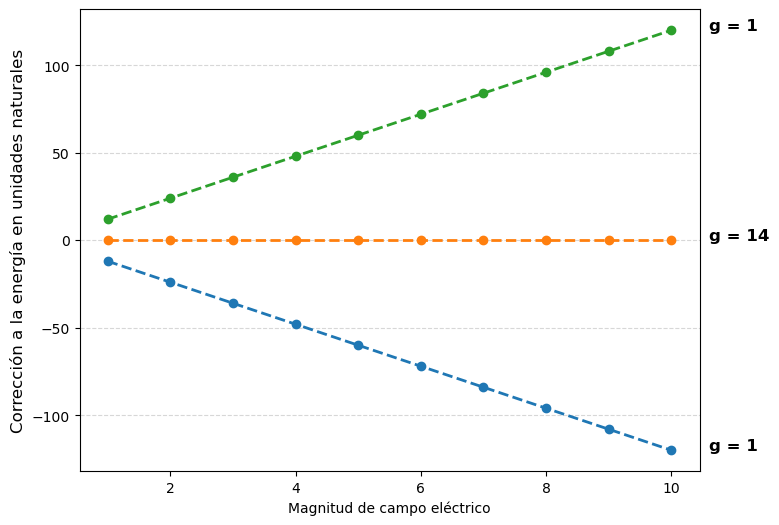

In [20]:
import matplotlib.pyplot as plt

n = 2 
Z = 1

field_vals = np.linspace(1,10,10)   # Discretizamos el campo

total_eigenVals = []

for i in range(len(field_vals)):
    
    Stark = Calc_Stark(n, Z)       # Calculamos la matriz de Stark
    Zeeman = Calc_Zeeman(n)        # Calculamos la matriz de Zeeman
    
    Total = Stark + Zeeman         # Sumamos las matrices
    
    eigen_vals, degen = EigenVals(Total, E0=field_vals[i], B0 = 0)   # Calculamos los autovalores sin campo magnético

    total_eigenVals.append(list(eigen_vals))                         # Guardamos los autovalores


fig, ax = plt.subplots(figsize=(8,6))

# Definimos los colores que van a rotar entre subplots
colors = plt.rcParams["axes.prop_cycle"]()

for i in range(len(total_eigenVals[0])):

    ax.plot(field_vals, np.array(total_eigenVals)[:,i], "o--", linewidth=2) # Graficamos la evolución de un autovalor

for energy, g in zip(eigen_vals, degen):
    
    # Línea de nivel
    c = next(colors)["color"]

    # Degeneración
    ax.text(field_vals[-1]+0.6, energy, f"g = {g}", fontsize=12, weight="bold")
    
ax.grid(axis="y", linestyle="--", alpha=0.5)
ax.set_ylabel(r"Corrección a la energía en unidades naturales", fontsize=12)
ax.set_xlabel("Magnitud de campo eléctrico")

plt.savefig("Electric.pdf")
plt.show()

### Gráfica del desdoblamiento de los niveles conforme aumenta el campo magnético 

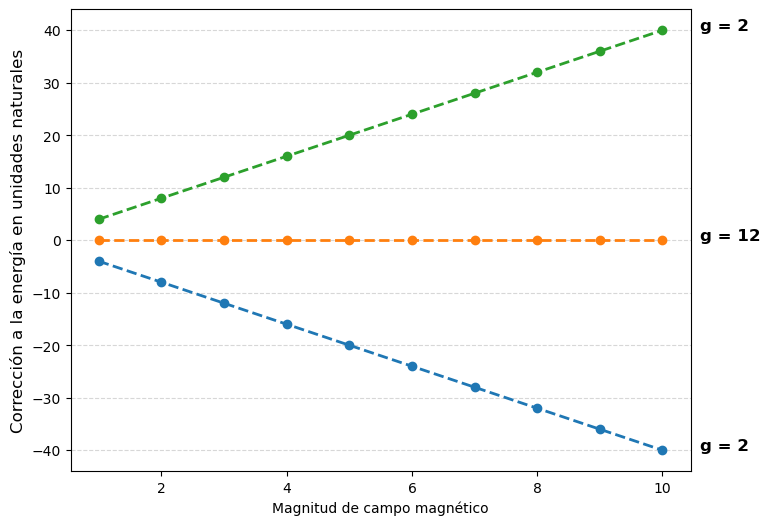

In [22]:
import matplotlib.pyplot as plt

field_vals = np.linspace(1,10,10)

total_eigenVals = []

for i in range(len(field_vals)):
    
    Stark = Calc_Stark(n, Z)
    Zeeman = Calc_Zeeman(n)
    
    Total = Stark + Zeeman
    
    eigen_vals, degen = EigenVals(Total, E0=0, B0 = field_vals[i])      # Calculamos los autovalores sin campo eléctrico

    total_eigenVals.append(list(eigen_vals))


fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(total_eigenVals[0])):

    ax.plot(field_vals, np.array(total_eigenVals)[:,i], "o--", linewidth=2)

for energy, g in zip(eigen_vals, degen):
    
    # Línea de nivel
    c = next(colors)["color"]

    # Degeneración
    ax.text(field_vals[-1]+0.6, energy, f"g = {g}", fontsize=12, weight="bold")
    
ax.grid(axis="y", linestyle="--", alpha=0.5)
ax.set_ylabel(r"Corrección a la energía en unidades naturales", fontsize=12)
ax.set_xlabel("Magnitud de campo magnético")

plt.savefig("Magnetic.pdf")
plt.show()

### Gráfica del desdoblamiento de los niveles conforme aumenta el campo eléctrico y magnético simultáneamente

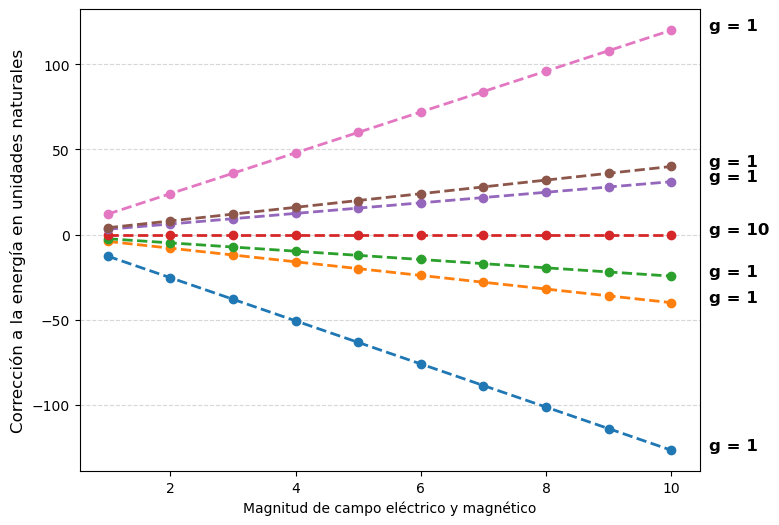

In [24]:
import matplotlib.pyplot as plt

field_vals = np.linspace(1,10,10)

total_eigenVals = []

for i in range(len(field_vals)):
    
    Stark = Calc_Stark(n, Z)
    Zeeman = Calc_Zeeman(n)
    
    Total = Stark + Zeeman
    
    eigen_vals, degen = EigenVals(Total, E0=field_vals[i], B0 = field_vals[i]) # Calculamos los autovalores con ambos campos

    total_eigenVals.append(list(eigen_vals))


fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(total_eigenVals[0])):

    ax.plot(field_vals, np.array(total_eigenVals)[:,i], "o--", linewidth=2)

for energy, g in zip(eigen_vals, degen):
    
    # Línea de nivel
    c = next(colors)["color"]

    # Degeneración
    ax.text(field_vals[-1]+0.6, energy, f"g = {g}", fontsize=12, weight="bold")
    
ax.grid(axis="y", linestyle="--", alpha=0.5)
ax.set_ylabel(r"Corrección a la energía en unidades naturales", fontsize=12)
ax.set_xlabel("Magnitud de campo eléctrico y magnético")

plt.savefig("E&M.pdf")
plt.show()

Podemos imprimir la matriz total que sumaría la perturbación debido al efecto Stark y efecto Zeeman en conjunto.

In [26]:
Total

Matrix([
[                 1.0*hbar*omega_0 + 0.5*hbar*omega_n,                                                    0,                                                    0,                                                    0, 1.0*hbar*omega_0 + 0.5*hbar*omega_n,                                   0,                                    0,                                    0, -3.0*E_0*a_0*q + 1.0*hbar*omega_0 + 0.5*hbar*omega_n,                                       -3.0*E_0*a_0*q,                                       -3.0*E_0*a_0*q,                                       -3.0*E_0*a_0*q, 1.0*hbar*omega_0 + 0.5*hbar*omega_n,                                   0,                                    0,                                    0],
[                                                   0,                  1.0*hbar*omega_0 - 0.5*hbar*omega_n,                                                    0,                                                    0,                                   0, 1.0